<a href="https://colab.research.google.com/github/priya1cvr/Hands-ON-ML/blob/main/5_1_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KMeans Clustering:** <br>
Initialize: pick K random points to be the cluster centers <br>
While not converged: <br>
 -  Assign each point to the nearest cluster center <br>
 -  Recalculate each cluster center from points that belong to it 

Sometimes  it's really easy for us to see clusters ( no labels needed) 
<br>
**Limitations**:  <br>
Boundaries may not be so clear <br> 
Data may not be 2D <br> 
Hence, we need an algorithm that will work despite those limitations 
So, we got KMeans clustering Algorithm.


**EX:1 Implement One Part of k-means Clustering** <br> 
- Generate a synthetic Dataset  X ( N * D ), N = no. of Samples and D = no. of features 
- Generate Cluster Identities Y (= Size of N) , 1D array 
    - Containing integers from 0...K-1 inclusive 
- Create Data however you like 
  - Totally Random
  - Or Appropriate for K-Means <br>
Let's Use N =300 , D=2, K=3<br>
Y[i] = { 0,1,2}  <br> 
100 Samples in each cluster 

Steps to do : <br> 
1. Calculate mean of each cluster 
2. Suppose K=3 ,loop through each of the cluster values ( 0,1,2) 
3. For each cluster, get all the points in X belonging to that cluster<br>
   e.g. for cluster 0 ,get all X[i] which belong to cluster 0 (using Y )
4. Obtain the mean of those data points 
5. Then repeat for cluster 1 & 2
6. What should be the size of mean of each cluster be ? 
   - Mean is just another point on the grid 
   - All the points are D-dimensional,hence mean is also D-dim; called Centroid
7. Plot your data on 2-D grid <br>
Color code the scatter plot according to cluster identities in Y.<br>
Plot the center of each cluster on the same scatter plot. 

X$_1$.......X$_n$ are the rows and D is the no. of columns 

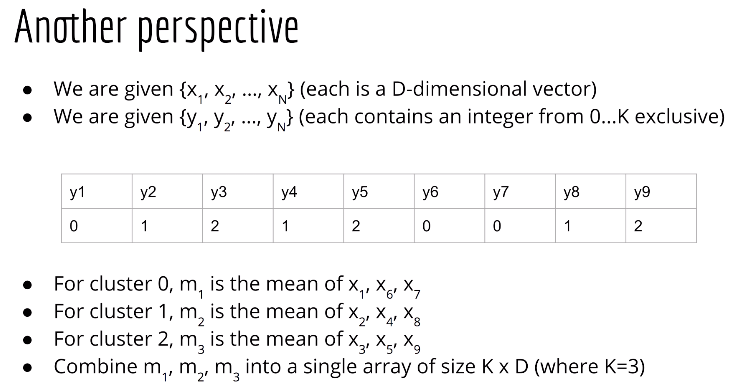

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(12)
D=2
K=3
N=300

In [ ]:
## Generate data 
## defining 3 means 
m1 = np.array([0,0]) 
m2 = np.array([5,5])
m3 = np.array([0,5])

X = np.zeros((N,D)) ## 300 rows with 2 cols all filled with zeros
X[:100, :] = np.random.randn(100, D) + m1 ## fills 1st 100 rows with 2 col ,ranndom value 
X[100:200,:] = np.random.randn(100, D) + m2 ## fills next 100 rows with 2 col ,random value + 5 added both cols 
X[200:,:] = np.random.randn(100, D) + m3 ##  fills last 100 rows with 2 col ,ranndom values + ( 0 added to 1st col and 5 to 2nd ) 

Y = np.array([0]*100 + [1]*100 + [2]*100)

In [ ]:
## lets see the data
print("Data within 1st 100 rows")
print(X[95:100, :])
print("\n\n Data within next 100 rows")
print(X[195:200, :])
print("\n\n Data within last 100 rows")
print(X[210:220, :])
print("\n\n Y values are:")
print(Y[0:10],"--",Y[100:110],"--",Y[205:210] )

Data within 1st 100 rows
[[-0.39032048 -2.15412444]
 [-1.29468375 -0.56622069]
 [-0.51770921 -0.39587831]
 [-0.60369525  0.36739289]
 [-0.95901181 -1.59529672]]


 Data within next 100 rows
[[5.07181684 3.87404516]
 [4.79369064 5.42158037]
 [4.44771025 6.48105198]
 [5.49592591 5.68267333]
 [4.43462325 4.86819453]]


 Data within last 100 rows
[[-1.10985141  5.886752  ]
 [ 1.9039378   4.34762188]
 [-0.32941493  3.42995558]
 [-1.01183459  5.31976478]
 [-0.77322299  5.10202665]
 [ 1.23250967  4.81239219]
 [-1.15998969  6.66371125]
 [ 0.60694278  5.20510446]
 [ 0.31588508  4.78263184]
 [ 0.69147371  3.60954353]]


 Y values are:
[0 0 0 0 0 0 0 0 0 0] -- [1 1 1 1 1 1 1 1 1 1] -- [2 2 2 2 2]


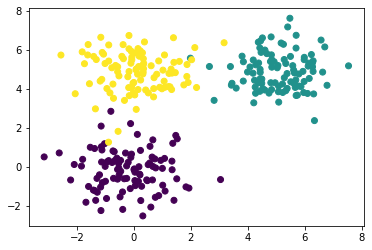

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y)


In [ ]:
#X[Y==0] # gives where Y ==0

In [ ]:
# Calculate mean of each cluster
means = np.zeros((K,D))
means[0,:] = X[Y==0].mean(axis=0)
means[1,:] = X[Y==1].mean(axis=0)
means[2,:] = X[Y==2].mean(axis=0)
means

array([[-0.20922598, -0.15132512],
       [ 5.07135574,  4.91986438],
       [ 0.09998475,  4.89978992]])

In [ ]:
## we can verify using np.mean
np.mean(X[:100,0]) , np.mean(X[:100,1])

(-0.2092259754391247, -0.15132512028933046)

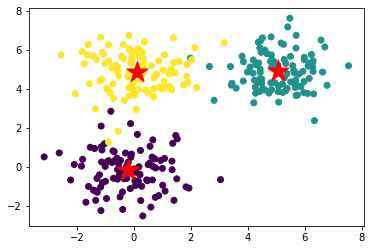

In [ ]:
## Plot the mean of the cluster 
plt.scatter(X[:,0], X[:,1], c=Y)
plt.scatter(means[:,0], means[:,1], s=500, c='red', marker='*')

**EX2** <br>
Given data(X),cluster means  <br>
Find cluster identities(Y) <br> 

Its opposite to what was done in Ex1 i.e given data(X),cluster identities(Y) <br>Find cluster means <br> 
Note: a point belongs to a cluster if that cluster's mean is closest to it.<br>
closeness measured in euclidean or squared euclidean distance 
<br>
Desired output Y = [0,0,0,1,1,1,2,2,2] 



In [ ]:
# generate means 
np.random.seed(1)
means = np.zeros((K,D))
means = np.random.randn(3,2)
means

array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ]])

In [ ]:
# Generate Data and then see which of those datas are closest to the mean 
np.random.seed(2)

X= np.random.randn(300,2)
X.shape

(300, 2)

In [ ]:
Y=np.zeros(N)
for i in range(N):
  temp_dict={}
  # get euclidean distance 
  temp_dict[0]=  np.sqrt(np.square(means[0]-X[i]).sum()) 
  temp_dict[1]=  np.sqrt(np.square(means[1]-X[i]).sum()) 
  temp_dict[2]=  np.sqrt(np.square(means[2]-X[i]).sum()) 
  min_val = min(temp_dict ,key =temp_dict.get)
  #print("X["+str(i)+"] is closest to :", min_val ) 
  Y[i]=min_val

In [ ]:
Y
#np.sqrt(np.square(means[0]-X[0]).sum()) ,np.sqrt(np.square(means[1]-X[0]).sum()),np.sqrt(np.square(means[2]-X[0]).sum()) 

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 2., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 2., 1., 0., 1., 0., 1., 0., 0., 1., 1., 2., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 2., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       2., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 2., 1., 1., 1., 1., 1., 2., 0., 0., 1., 2., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 2., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0.

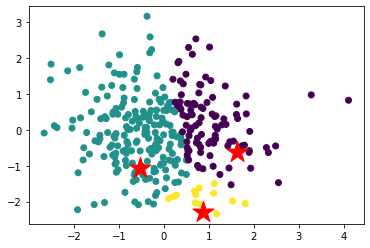

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.scatter(means[:,0], means[:,1], s=500, c='red', marker='*')

**KMeans : Initialization Step** <br>
Initialize (assign random points in X to be cluster centers) <br>
Loop:<br>
Assign cluster identities based on current cluster centers i.e. EX 1<br>
Calculate cluster centers based on cluster identities i.e. EX 2<br>
Check for convergence (cluster identities haven't changed) 

**Ex 3:Implement KMeans in code** <br>
Simply combine EX1 and EX2 <br>

Generate X (N,D) <br>
Initialize cluster centers by randomly choosing K points from X  <br>
Loop:<br>
Above 2 steps discussed <br>
Exit loop if converged <br>

Scatter plot of data colored by cluster identity ,showing cluster centers 

In [ ]:
## Generate data 
## defining 3 means 
m1 = np.array([0,0]) 
m2 = np.array([5,5])
m3 = np.array([0,5])

X = np.zeros((N,D)) ## 300 rows with 2 cols all filled with zeros
X[:100, :] = np.random.randn(100, D) + m1 ## fills 1st 100 rows with 2 col ,ranndom value 
X[100:200,:] = np.random.randn(100, D) + m2 ## fills next 100 rows with 2 col ,ranndom value + 5 added both cols 
X[200:,:] = np.random.randn(100, D) + m3 ##  fills last 100 rows with 2 col ,ranndom values + ( 0 added to 1st col and 5 to 2nd ) 

#Y = np.array([0]*100 + [1]*100 + [2]*100)

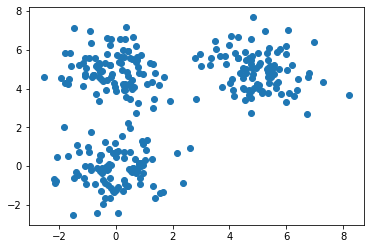

In [ ]:
plt.scatter(X[:,0], X[:,1])


In [ ]:
#Initialize cluster centers by randomly choosing K points from X
np.random.seed(7)
random_indices = np.random.choice(N, size=K, replace=False)
cluster_center = X[random_indices, :]

cluster_center_0 = cluster_center[0]
cluster_center_1 = cluster_center[1]
cluster_center_2 = cluster_center[2]

In [ ]:
cluster_center

array([[ 0.16704869,  6.54128788],
       [-0.25712497, -0.1369783 ],
       [ 4.58986326,  4.78005783]])

In [ ]:
#Assign cluster identities based on current cluster centers
Y=np.zeros(N) # cluster identities
max_iter=20
temp_dict={}
Y_saved = []
for j in range(max_iter):
  
  ## check for convergence 
  Y_old = Y.copy()
  Y_saved.append(Y_old)
  for i in range(N): 
    # get euclidean distance for nearest point to initial cluster center
    temp_dict[0]=  np.sqrt(np.square(cluster_center[0] - X[i]).sum()) 
    temp_dict[1]=  np.sqrt(np.square(cluster_center[1] - X[i]).sum()) 
    temp_dict[2]=  np.sqrt(np.square(cluster_center[2] - X[i]).sum()) 
    min_val = min(temp_dict ,key =temp_dict.get)
    Y[i]=min_val
    ## min_val gives which X[i] is nearest  to the one of cluster centers 
    ## then update that cluster center with the mean of those   points which belong to that cluster 
  for k in range(K):
    cluster_center[k,:] = X[Y==k].mean(axis=0)
  
  print("Iteration j=",j, cluster_center)
    ## check for convergence 
  if np.all(Y_old == Y):
    print("Converged on step i = ",i)
    break

Iteration j= 0 [[-0.11676946  5.00759497]
 [-0.01262741 -0.08009772]
 [ 4.98602341  4.89697963]]
Iteration j= 1 [[-0.07327926  4.94760299]
 [-0.03327538 -0.13913951]
 [ 5.01642286  4.91239927]]
Iteration j= 2 [[-0.07327926  4.94760299]
 [-0.03327538 -0.13913951]
 [ 5.01642286  4.91239927]]
Converged on step i =  299


In [ ]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0.

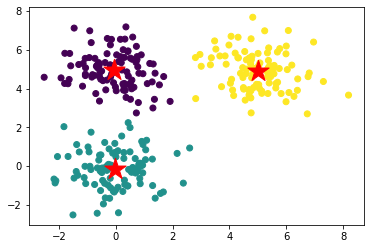

In [ ]:
plt.scatter(X[:,0], X[:,1],c=Y)
plt.scatter(cluster_center[:,0], cluster_center[:,1], s=500, c='red', marker='*')

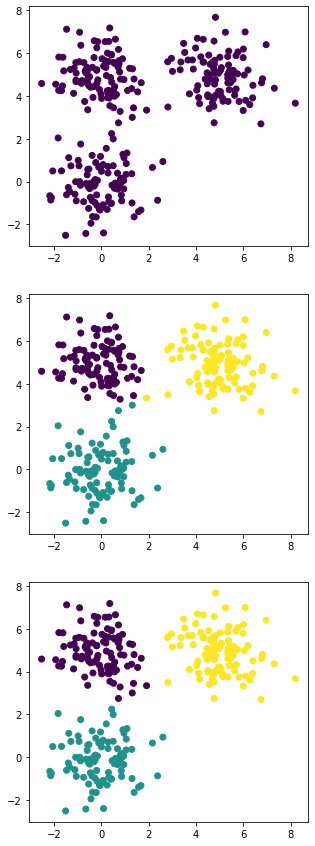

In [ ]:
## show training progress 
M = len(Y_saved)
fig,ax = plt.subplots(figsize=(5,5*M))
for i in range(M):
  plt.subplot(M, 1, i+1)# 1st : # rows in plot ,2nd : # of cols, 3rd : which plot it is 
  Y = Y_saved[i]
  plt.scatter(X[:,0],X[:,1],c=Y)

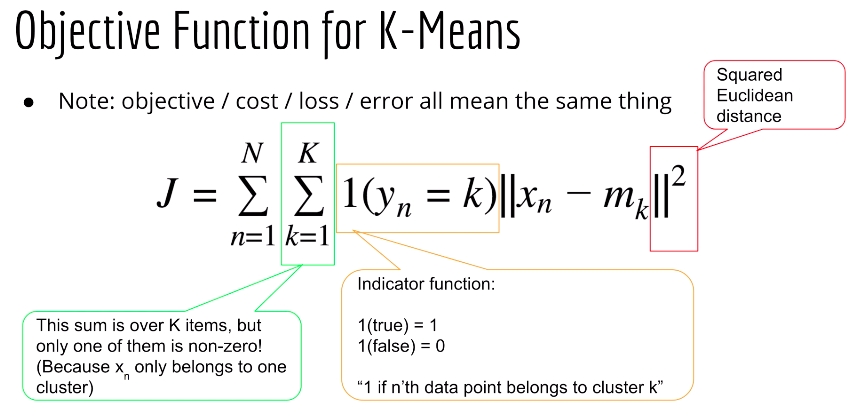

### Alternative Notation 

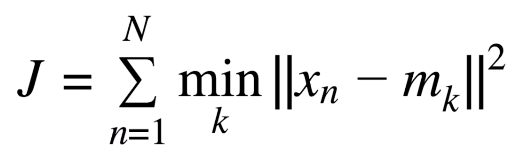

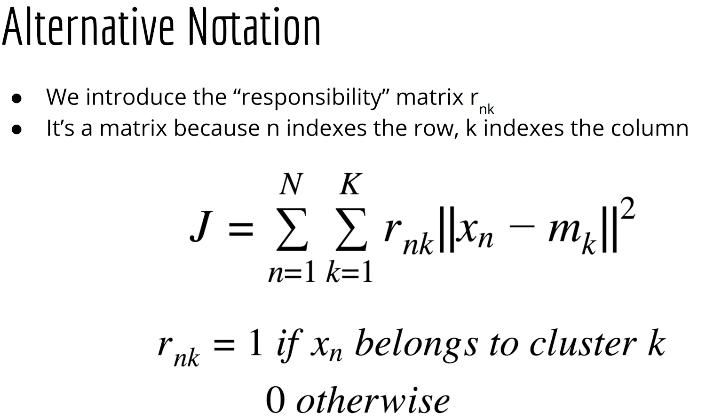

### KMeans Objective function

In [ ]:
## Generate data 
## defining 3 means 
m1 = np.array([0,0]) 
m2 = np.array([5,5])
m3 = np.array([0,5])

X = np.zeros((N,D)) ## 300 rows with 2 cols all filled with zeros
X[:100, :] = np.random.randn(100, D) + m1 ## fills 1st 100 rows with 2 col ,ranndom value 
X[100:200,:] = np.random.randn(100, D) + m2 ## fills next 100 rows with 2 col ,ranndom value + 5 added both cols 
X[200:,:] = np.random.randn(100, D) + m3 ##  fills last 100 rows with 2 col ,ranndom values + ( 0 added to 1st col and 5 to 2nd ) 



In [ ]:
X[0:10]

array([[ 0.96107646,  0.56077717],
       [-1.32464134,  0.66520368],
       [-0.47841788,  0.38538654],
       [ 0.30068042,  1.21931888],
       [ 0.11655994, -1.85380587],
       [-1.36985972,  0.73115439],
       [-0.25831633,  1.13797906],
       [ 0.27343882, -0.74906574],
       [ 1.08240676, -0.80739768],
       [-2.05263551,  2.06379555]])

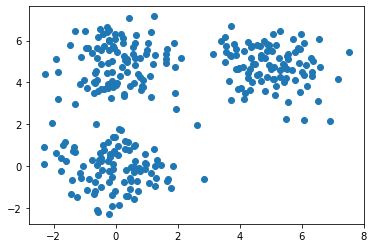

In [ ]:
plt.scatter(X[:,0], X[:,1])

In [ ]:
## initialization , assign  cluster centers randomly
np.random.seed(6)
random_indices = np.random.choice(N, size=K, replace=False)
cluster_centers = X[random_indices, :]


In [ ]:
cluster_centers

array([[-0.12690915, -0.5191373 ],
       [ 6.06012555,  2.20521524],
       [-1.86928024,  3.21918495]])

In [ ]:
## Cost function 
#k-means loop 

Y=np.zeros(N) # cluster identities
max_iter=20
min_dists = np.zeros(N)
cost = []
temp_dict={}
for j in range(max_iter):
  
  ## check for convergence 
  Y_old = Y.copy()
  
  for i in range(N): 
    # get euclidean distance for nearest point to initial cluster center
    temp_dict[0]=  np.sqrt(np.square(cluster_centers[0] - X[i]).sum()) 
    temp_dict[1]=  np.sqrt(np.square(cluster_centers[1] - X[i]).sum()) 
    temp_dict[2]=  np.sqrt(np.square(cluster_centers[2] - X[i]).sum()) 
    min_val = min(temp_dict ,key =temp_dict.get)
    Y[i]=min_val
    min_dists[i] = min(temp_dict.values())
    ## min_val gives which X[i] is nearest  to the one of cluster centers 
     
  ## store the cost 
  cost.append(min_dists.sum())

  ## then update that cluster center with the mean of those   points which belong to that cluster
  for k in range(K):
    cluster_centers[k,:] = X[Y==k].mean(axis=0)
  
  print("Iteration j=",j, cluster_centers)
    ## check for convergence 
  if np.all(Y_old == Y):
    print("Converged on step i = ",i)
    break

Iteration j= 0 [[-3.44982710e-03 -1.46016576e-01]
 [ 4.97419171e+00  4.77577468e+00]
 [ 1.48481059e-02  4.80279573e+00]]
Iteration j= 1 [[-0.04285665 -0.05839128]
 [ 4.99778416  4.80399276]
 [ 0.0818008   4.93352869]]
Iteration j= 2 [[-0.04285665 -0.05839128]
 [ 4.99778416  4.80399276]
 [ 0.0818008   4.93352869]]
Converged on step i =  299


In [ ]:
min_dists.shape

(300,)

In [ ]:
cost

[702.0348476014751, 371.94438547343566, 370.5525332811124]

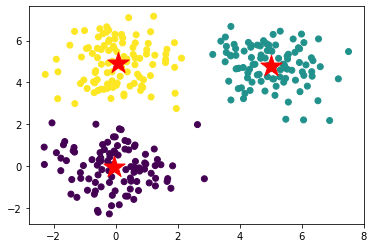

In [ ]:
## plot means with data 
plt.scatter(X[:,0], X[:,1],c=Y)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s=500, c='red', marker='*')

Text(0.5, 0, 'iteration')

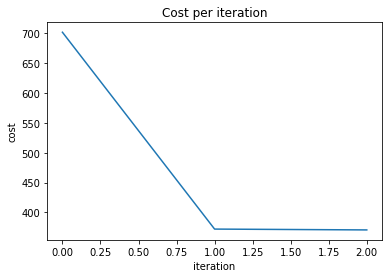

In [ ]:
plt.plot(cost)
plt.title("Cost per iteration")
plt.ylabel('cost')
plt.xlabel('iteration')

In [ ]:
## lets use manhattan distance instead of euclidean distance  and check the cost per iteration 
np.random.seed(2)
random_indices = np.random.choice(N, size=K, replace=False)
cluster_centers = X[random_indices, :]

In [ ]:
cluster_centers

array([[ 0.12199862,  1.77902623],
       [-0.1128769 ,  4.07425546],
       [ 3.13242326,  5.33805095]])

In [ ]:
## Cost function 
#k-means loop 

Y=np.zeros(N) # cluster identities
max_iter=20
min_dists = np.zeros(N)
cost = []
temp_dict={}
for j in range(max_iter):
  
  ## check for convergence 
  Y_old = Y.copy()
  
  for i in range(N): 
    # get euclidean distance for nearest point to initial cluster center
    temp_dict[0]=  (np.abs(cluster_centers[0] - X[i]).sum()) 
    temp_dict[1]=  (np.abs(cluster_centers[1] - X[i]).sum()) 
    temp_dict[2]=  (np.abs(cluster_centers[2] - X[i]).sum()) 
    min_val = min(temp_dict ,key =temp_dict.get)
    Y[i]=min_val
    min_dists[i] = min(temp_dict.values())
    ## min_val gives which X[i] is nearest  to the one of cluster centers 
     
  ## store the cost 
  cost.append(min_dists.sum())

  ## then update that cluster center with the mean of those   points which belong to that cluster
  for k in range(K):
    cluster_centers[k,:] = X[Y==k].mean(axis=0)
  
  print("Iteration j=",j, cluster_centers)
    ## check for convergence 
  if np.all(Y_old == Y):
    print("Converged on step i = ",i)
    break

Iteration j= 0 [[-0.02325492 -0.03085442]
 [-0.14952467  4.86249341]
 [ 4.5880653   4.89306563]]
Iteration j= 1 [[-0.04285665 -0.05839128]
 [ 0.0818008   4.93352869]
 [ 4.99778416  4.80399276]]
Iteration j= 2 [[-0.04285665 -0.05839128]
 [ 0.0818008   4.93352869]
 [ 4.99778416  4.80399276]]
Converged on step i =  299


In [ ]:
cost

[706.6587600366797, 478.88491192488556, 472.0783801920378]

Text(0.5, 0, 'iteration')

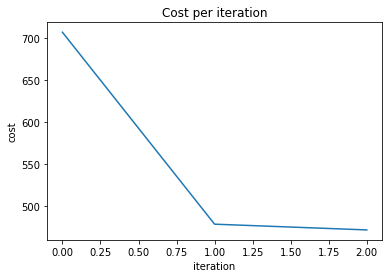

In [ ]:
plt.plot(cost)
plt.title("Cost per iteration")
plt.ylabel('cost')
plt.xlabel('iteration')

**One Problem With KMeans** <br>
- Highly sensitive to initialization
- Possible resolution : restart multiple times , use whichever result gives us the best final objective 
- What does this tell us ?? Local Minima 
- Another possible resolution: "fuzzy" membership in each class
- Just a small adjustment to the original k-means algorithm.

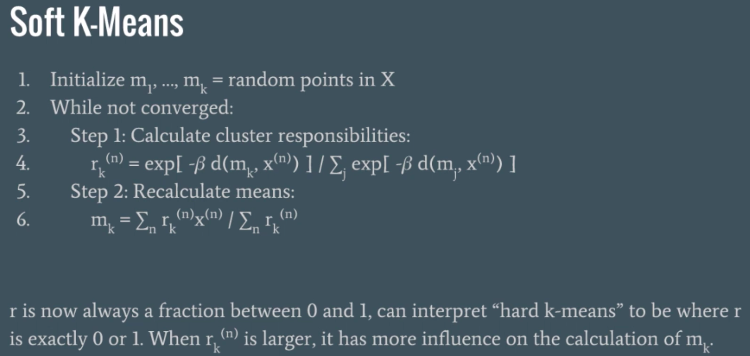

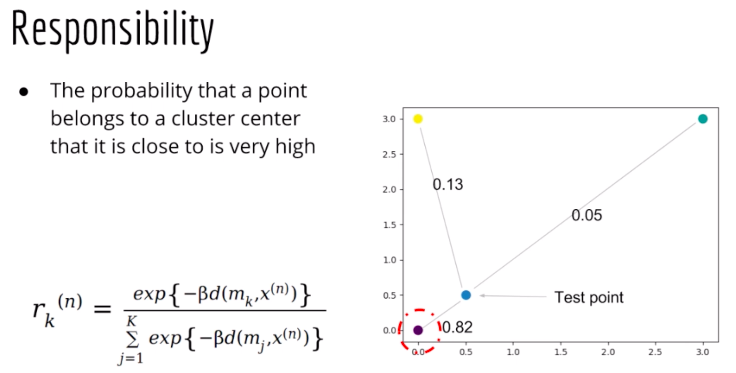

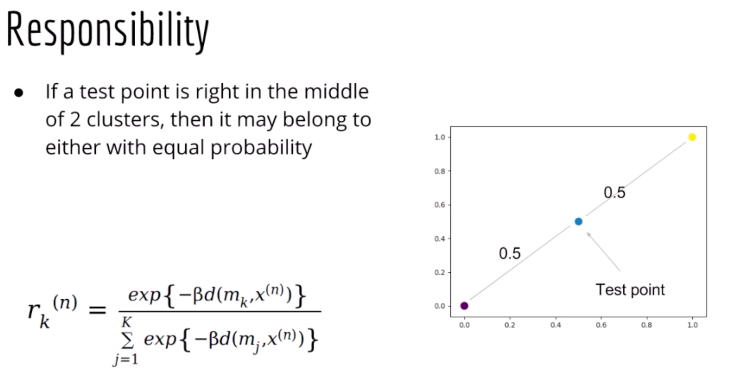

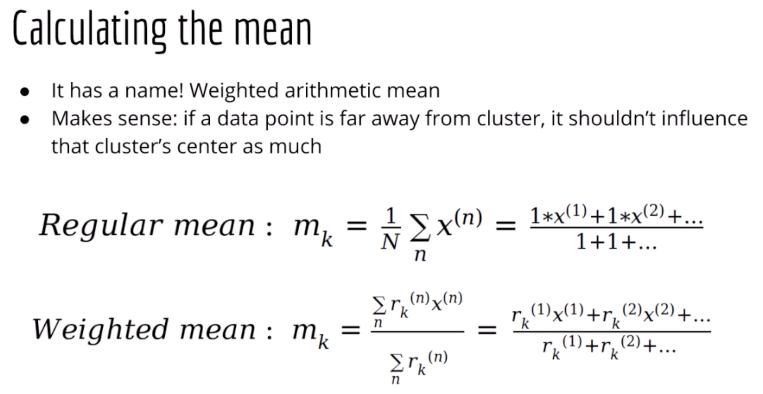

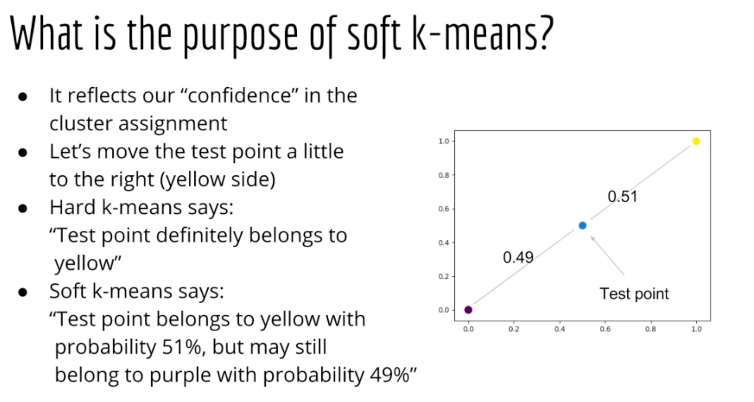

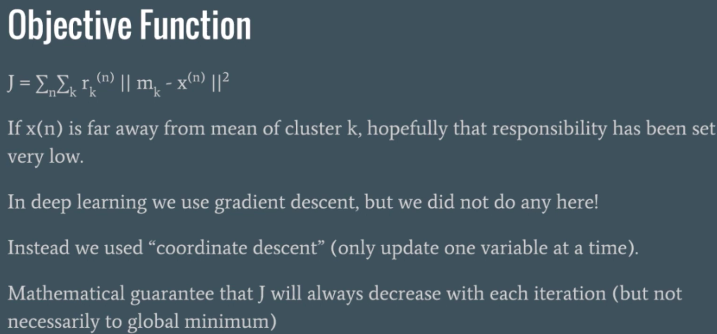

#### Soft KMeans Code 

In [ ]:
D=2
s =4
N = 900

## Generate data 
## defining 3 means 
m1 = np.array([0,0]) 
m2 = np.array([s,s])
m3 = np.array([0,s])

X = np.zeros((N,D)) ## 900 rows with 2 cols all filled with zeros
X[:300, :] = np.random.randn(300, D) + m1 ## fills 1st 300 rows with 2 col ,ranndom value 
X[300:600,:] = np.random.randn(300, D) + m2 ## fills next 300 rows with 2 col ,ranndom value + s added both cols 
X[600:,:] = np.random.randn(300, D) + m3 ##  fills last 300 rows with 2 col ,ranndom values + ( 0 added to 1st col and s to 2nd ) 


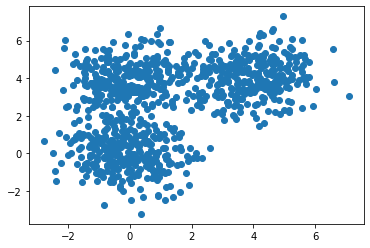

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
def get_simple_data():
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900 # number of samples
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3
    return X

In [ ]:
def d(u,v):
  diff = u-v
  return diff.dot(diff)

In [ ]:
def cost(X,R,M):
  cost =0 
  for k in range(len(M)):
    for n in range(len(X)):
      cost += R[n,k] * d(M[k],X[n])
  return cost

In [ ]:

def plot_k_means(X, K, max_iter=20, beta=1.0):
  N,D = X.shape
  M = np.zeros((K,D)) ## Means 
  R = np.zeros((N,K)) ## Responsibility Matrix

  for k in range(K):
    M[k] = X[np.random.choice(N)]
  
  grid_width = 5
  grid_height = max_iter/ grid_width
  random_colors = np.random.random((K,3))
  plt.figure()

  costs = np.zeros(max_iter)
  for i in range(max_iter):
    colors = R.dot(random_colors)
    plt.subplot(grid_width, grid_height, i+1)
    plt.scatter(X[:,0],X[:,1],c=colors)
    plt.show()

    for k in range(K):
      for n in range(N):
        R[n,k] = np.exp(-beta*d(M[k],X[n])) / np.sum(np.exp(-beta*d(M[j],X[n])) for j in range(K))
    
    for k in range(K):
      M[k]= R[:,k].dot(X) / R[:,k].sum()
    
    costs[i] = cost(X,R,M)
    if i >0:
      if np.abs(costs[i] - costs[i-1]) < 0.1:
        break
  plt.plot(costs)
  plt.title("Costs")
  plt.show()

  

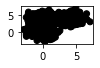

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


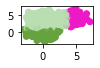

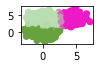

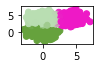

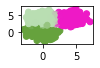

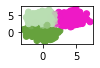

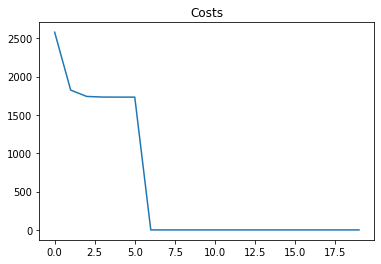

In [ ]:
K=3
plot_k_means(X,K)

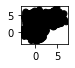

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


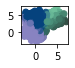

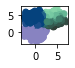

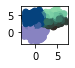

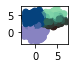

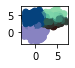

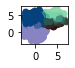

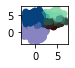

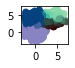

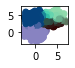

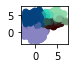

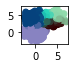

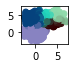

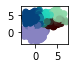

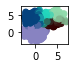

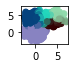

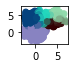

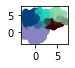

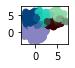

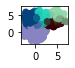

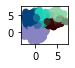

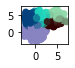

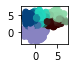

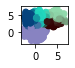

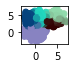

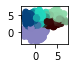

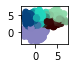

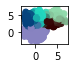

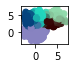

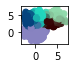

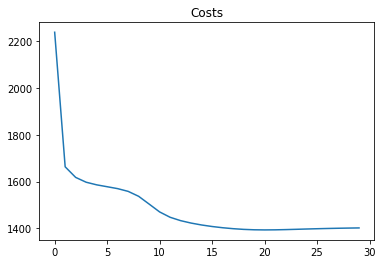

In [ ]:
K=5
plot_k_means(X,K,max_iter=30)

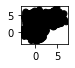

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


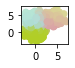

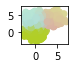

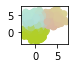

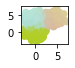

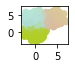

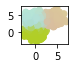

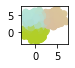

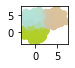

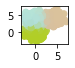

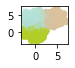

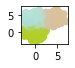

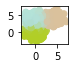

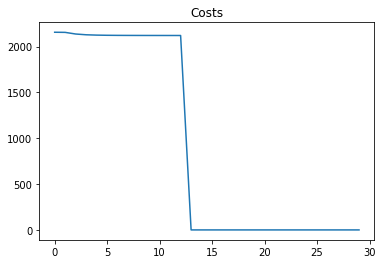

In [ ]:
K=5
plot_k_means(X,K,max_iter=30, beta=0.3)

**Examples Where KMeans can Fail**

In [ ]:
## 1. donought problem 
def donut():
  N=1000
  D=2

  R_inner = 5
  R_outer =10

  R1 = np.random.randn(N//2) + R_inner 
  theta = 2*np.pi*np.random.random(N//2)
  X_inner = np.concatenate([[ R1 * np.cos(theta)], [R1*np.sin(theta)]]).T

  R2 = np.random.randn(N//2) + R_outer
  theta = 2*np.pi*np.random.random(N//2)
  X_outer = np.concatenate([[ R2 * np.cos(theta)], [R2*np.sin(theta)]]).T

  X = np.concatenate([X_inner,X_outer])
  return X


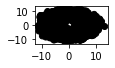

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


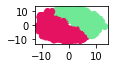

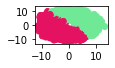

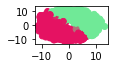

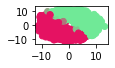

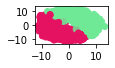

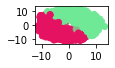

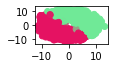

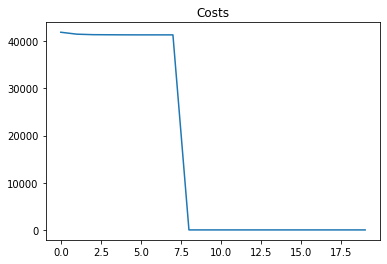

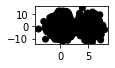

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


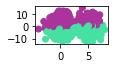

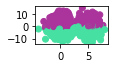

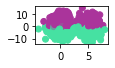

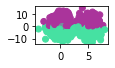

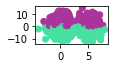

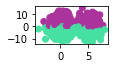

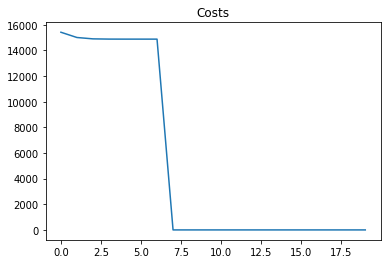

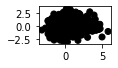

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


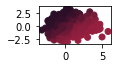

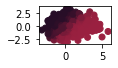

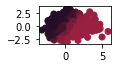

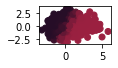

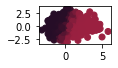

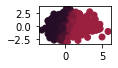

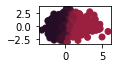

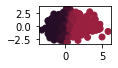

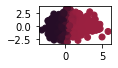

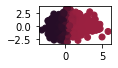

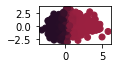

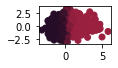

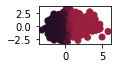

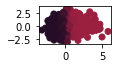

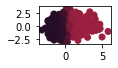

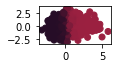

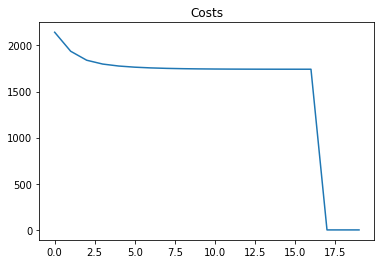

In [ ]:
X= donut()
plot_k_means(X,2)

X=np.zeros((1000,2))
X[:500,:] = np.random.multivariate_normal([0,0],[[1,0],[0,20]],500)
X[500:,:] = np.random.multivariate_normal([5,0],[[1,0],[0,20]],500)
plot_k_means(X,2)

X = np.zeros((1000,2))
X[:950,:] = np.array([0,0]) + np.random.randn(950,2)
X[950:,:] = np.array([3,0]) + np.random.randn(50,2)
plot_k_means(X,2)


**DisAdvantages of KMeans** <br>
- You have to choose K 
  - We can look at 2D or 3D data to help us choose. What about 100D data ? 
- Local Minima 
  - Not necessarily bad( Deep Learning) .But in KMeans its bad
  - Restart Multiple times 
- Sensitive to initial Configuration
- Can't Solve donut problem
  - Can't even solve elliptical problems
  - Can only look for spherical clusters 
- Doesn't take into account density


**Cost Function Alternatives** <br>

Current Cost Function: <br>
Pros<br>
- Decreases on every round 
- Makes perfect sense- we want data points to be close to the cluster center that it belongs to, so squared distance should be low when responsibility --> 1
- We want "low intra-cluster distances"
- We want "high inter-cluster distances"


Cons <br> 
- Really large dataset :Since ,its the sum of squared distances ,it grows with size of dataset .
- Sensitive to scale: Data is in range 0....1 , squared distances will be <1 , Data in range 10^-6 , squared distances will be 10^-12
- Sensitive to K : if K=N (trivial case) ,cost =0

Is high K = overfitting ?? NO , Overfitting is concept for Supervised Learning. It means we go too close to training targets,far away from test targets. This is UnSupervised Learning ,We have no targets.

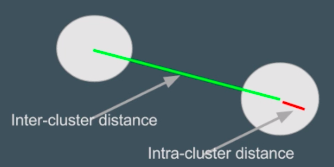

One way to evaluate clustering is by **Purity** 

**Purity** <br>
- Balances by # Samples
- C(k) = set of data points that belong to cluster k
- t(j) = set of data points that belong to target class j
- We need to search all j - max intersection means this is most likely class

Example MNIST = handwritten digits from 0..9
- We have cluster center, we don't know what it means ,but we know which data points belong to it from K-means.
- We check all the true targets , suppose the max intersection is class 5 
- Then we know this cluster represents handwritten digits for 5
- Hence, Max purity =1

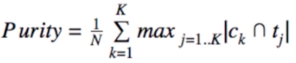



**DisAdvantages of Purity** <br>
- It requires true labels 
- If we have true labels, then we might have used supervised learning.
- Other measures that require targets: 
  - Rand Measure
  - F-Measure
  - Jaccard Index
  - Normalized Mutual Information
- Methods that require true labels are called "external validation" Methods

Daavies Bouldin doesn't require true labels 

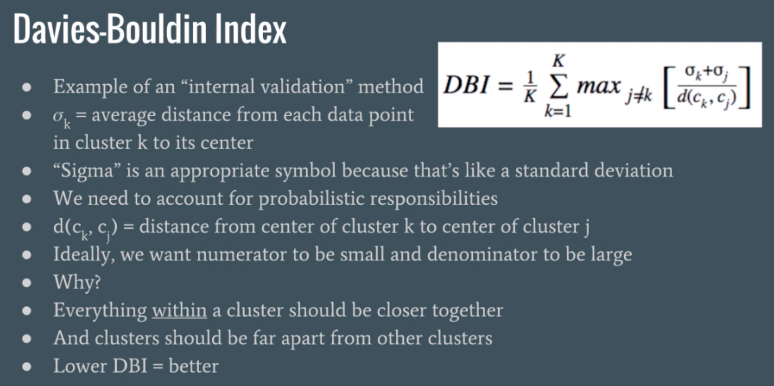

### Cost decreases as K increases
- Cost **ALWAYS** decreases as K increases, there's no notion of generalization or test error with UnSupervised Learning.
- Why??
- Cost = Within Cluster sum-of-squared-error 
- i.e closer to center == cost is lower
- But adding more cluster centers(a.k.a increasing K) helps ALL points be closer to cluster center.
- If that doesn't make sense, imagine K = N (# data points)
- Here, each cluster consist of only 1 data point
- Therefore, center of the cluster is the data point.
- Therefore, the total cost = 0 ( Since all distances are 0) 


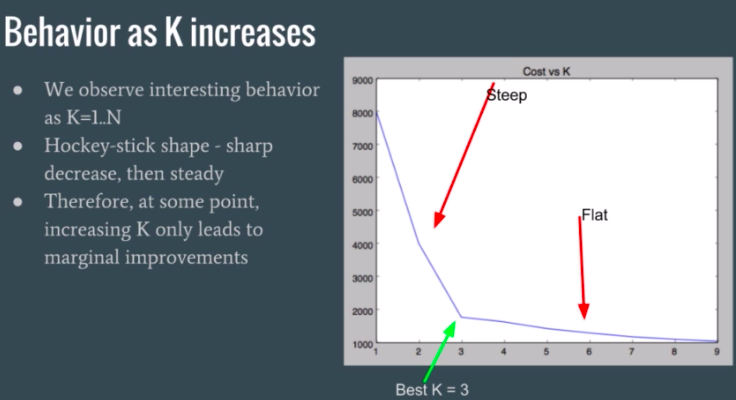

In [ ]:
def plot_k_means(X, K, max_iter=20, beta=3.0, show_plots=False):
    N, D = X.shape
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    initial_centers = np.random.choice(N, K, replace=False)
    M = X[initial_centers]

    costs = []
    k = 0
    for i in range(max_iter):
        k += 1
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
        R = exponents / exponents.sum(axis=1, keepdims=True)


        # step 2: recalculate means
        # decent vectorization
        # for k in range(K):
        #     M[k] = R[:,k].dot(X) / R[:,k].sum()
        # oldM = M

        # full vectorization
        M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
        # print("diff M:", np.abs(M - oldM).sum())

        c = cost(X, R, M)
        costs.append(c)
        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 1e-5:
                break

        if len(costs) > 1:
            if costs[-1] > costs[-2]:
                pass
                # print("cost increased!")
                # print("M:", M)
                # print("R.min:", R.min(), "R.max:", R.max())

    if show_plots:
        plt.plot(costs)
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

    print("Final cost", costs[-1])
    return M, R

Final cost 8237.139280734596
Final cost 4017.7832415392722
Final cost 1766.759221291353
Final cost 1591.4327464336648
Final cost 1424.0850701596314
Final cost 1324.3982774140568
Final cost 1206.3120686148775
Final cost 1165.2421118482946
Final cost 1009.2441107580574


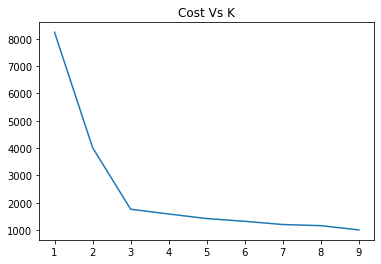

In [ ]:
X = get_simple_data()
costs = np.empty(10)
costs[0] = None
for k in range(1,10):
  M,R = plot_k_means(X,k, max_iter=20, beta=1.0)
  c = cost(X, R, M)
  costs[k]=c

plt.plot(costs)
plt.title("Cost Vs K")
plt.show()

**K Means Application Related words** <br> 
- Plot and find clustering of words from book titles
- Create a term document matrix ( each document is a book title) i.e each row is a term and each column is a document
- N = # words in vocabulary
- D = # Documents
- X[n,d]= # word n appears in document d 
- Convert X into TF-IDF Matrix 
- TF = term frequency = word counts 
- IDF = inverse document frequency 
- **WHY ??**
- Pure word counts can be misleading ,e.g Neutron appears lot in physics document , The,it appears a lot hence meaningless.
- Therefore scale the term-frequency by inverse document frequency
- If a word appears in lot of documents then its probably not that import 
- Reduce Dimensionality from D --> 2 ,so that we can plot it 
- Use an algorithm called t-SNE 
- Finally we perform K-Means with K = N/10
- Naive assumption is that each cluster will have 10 words on average

In [ ]:
#https://github.com/lazyprogrammer/machine_learning_examples/blob/master/nlp_class/all_book_titles.txt

In [ ]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input

import networkx as nx
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding as LLE
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
import urllib
url='https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/all_book_titles.txt'
file = urllib.request.urlopen(url)
titles=[]
for line in file:
	decoded_line = line.decode("utf-8")
	titles.append(decoded_line.rstrip())

In [ ]:
len(titles)

2373

In [ ]:
titles[0:10]

['Philosophy of Sex and Love A Reader',
 'Readings in Judaism, Christianity, and Islam',
 'Microprocessors Principles and Applications',
 'Bernhard Edouard Fernow: Story of North American Forestry',
 'Encyclopedia of Buddhism',
 'Motorola Microprocessor Family: 68000, 68008, 68010, 68020, 68030, and 68040, Programming and Interfacing with Applications',
 'American Anthem: Student Edition Modern Era 2007',
 'How to Read Literature Like a Professor A Lively and Entertaining Guide to Reading Between the Lines',
 'Men Are from Mars, Women Are from Venus Secrets of Great Sex, Improving Communication, Lasting Intimacy and Fulfillment, Giving and Receiving Love, Secrets of Passion, Understanding Martian',
 'Religious Traditions of the World A Journey Through Africa, Mesoamerica, North America, Judaism, Christianity, Islam, Hinduism, Buddhism, China, an']

In [ ]:
url='https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/stopwords.txt'
file = urllib.request.urlopen(url)
stopwords=[]
for line in file:
	decoded_line = line.decode("utf-8")
	stopwords.append(decoded_line.rstrip())

## convert to set 
stopwords = set(stopwords)

In [ ]:
print(len(stopwords))
## add more stopwords specific to this problem
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })
print(len(stopwords))



419
437


In [ ]:
def my_tokenizer(s):
  s = s.lower()
  tokens = nltk.tokenize.word_tokenize(s) # split string into words
  tokens = [t for t in tokens if len(t)>2 ] # removing short words , mayn't be that useful
  tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens ] # put words into base form
  tokens = [ t for t in tokens if t not in stopwords] # removing stopwords
  tokens = [ t for t in tokens if not any(c.isdigit() for c in t) ] # remove any digits e.g 2nd Version
  return tokens

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# create a word-to-index map so that we can create our word-frequency vectors later
# let's also save the tokenized versions so we don't have to tokenize again later
word_index_map ={}
current_index =0
all_tokens =[]
all_titles =[]
index_word_map = []
print("num titles:", len(titles))
print("first title:", titles[0])

for title in titles:
  try:
    title = title.encode('ascii', 'ignore') # throws exception for bad characters
    title = title.decode('utf-8')
    all_titles.append(title)
    tokens = my_tokenizer(title)
    all_tokens.append(tokens)
    for token in tokens:
      if token not in word_index_map:
        word_index_map[token] = current_index
        current_index +=1 
        index_word_map.append(token)
  except Exception as e:
    print(e)


num titles: 2373
first title: Philosophy of Sex and Love A Reader


In [ ]:
all_tokens[0:5]

[['philosophy', 'sex', 'love', 'reader'],
 ['reading', 'judaism', 'christianity', 'islam'],
 ['microprocessor', 'principle'],
 ['bernhard', 'edouard', 'fernow', 'story', 'north', 'american', 'forestry'],
 ['encyclopedia', 'buddhism']]

In [ ]:
all_titles[0:5]

['Philosophy of Sex and Love A Reader',
 'Readings in Judaism, Christianity, and Islam',
 'Microprocessors Principles and Applications',
 'Bernhard Edouard Fernow: Story of North American Forestry',
 'Encyclopedia of Buddhism']

In [ ]:
word_index_map

{'philosophy': 0,
 'sex': 1,
 'love': 2,
 'reader': 3,
 'reading': 4,
 'judaism': 5,
 'christianity': 6,
 'islam': 7,
 'microprocessor': 8,
 'principle': 9,
 'bernhard': 10,
 'edouard': 11,
 'fernow': 12,
 'story': 13,
 'north': 14,
 'american': 15,
 'forestry': 16,
 'encyclopedia': 17,
 'buddhism': 18,
 'motorola': 19,
 'family': 20,
 'programming': 21,
 'interfacing': 22,
 'anthem': 23,
 'student': 24,
 'modern': 25,
 'era': 26,
 'read': 27,
 'literature': 28,
 'professor': 29,
 'lively': 30,
 'entertaining': 31,
 'line': 32,
 'mar': 33,
 'woman': 34,
 'venus': 35,
 'secret': 36,
 'improving': 37,
 'communication': 38,
 'lasting': 39,
 'intimacy': 40,
 'fulfillment': 41,
 'giving': 42,
 'receiving': 43,
 'passion': 44,
 'understanding': 45,
 'martian': 46,
 'religious': 47,
 'tradition': 48,
 'world': 49,
 'journey': 50,
 'africa': 51,
 'mesoamerica': 52,
 'america': 53,
 'hinduism': 54,
 'china': 55,
 'wisdom': 56,
 'sacred': 57,
 'text': 58,
 'religion': 59,
 'illustrated': 60,
 's

In [ ]:
## now let's create our input matrices - just indicator variables for this example - works better than proportions
def tokens_to_vector(tokens):
  x = np.zeros(len(word_index_map))
  for t in tokens:
    i = word_index_map[t]
    x[i] += 1
  return x 

In [ ]:
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D,N))
i = 0
for token in all_tokens:
  X[:,i] = tokens_to_vector(token)
  i += 1

In [ ]:
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)

def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost

In [ ]:
def plot_k_means(X, K, index_word_map, max_iter=20, beta=1.0, show_plots=True):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    costs = np.zeros(max_iter)
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                # R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum( np.exp(-beta*d(M[j], X[n])) for j in range(K) )
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))

        R = exponents / exponents.sum(axis=1, keepdims=True)

        # step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 10e-5:
                break

    if show_plots:
        # plt.plot(costs)
        # plt.title("Costs")
        # plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.figure(figsize=(80.0, 80.0))
        plt.scatter(X[:,0], X[:,1], s=300, alpha=0.9, c=colors)
        annotate1(X, index_word_map)
        # plt.show()
        plt.savefig("test.png")

    # print out the clusters
    hard_responsibilities = np.argmax(R, axis=1) # is an N-size array of cluster identities
    # let's "reverse" the order so it's cluster identity -> word index
    cluster2word = {}
    for i in range(len(hard_responsibilities)):
      word = index_word_map[i]
      cluster = hard_responsibilities[i]
      if cluster not in cluster2word:
        cluster2word[cluster] = []
      cluster2word[cluster].append(word)

    # print out the words grouped by cluster
    for cluster, wordlist in cluster2word.items():
      print("cluster", cluster, "->", wordlist)

    return M, R


In [ ]:
def annotate1(X, index_word_map, eps=0.1):
  N, D = X.shape
  placed = np.empty((N, D))
  for i in range(N):
    x, y = X[i]

    # if x, y is too close to something already plotted, move it
    close = []

    x, y = X[i]
    for retry in range(3):
      for j in range(i):
        diff = np.array([x, y]) - placed[j]

        # if something is close, append it to the close list
        if diff.dot(diff) < eps:
          close.append(placed[j])

      if close:
        # then the close list is not empty
        x += (np.random.randn() + 0.5) * (1 if np.random.rand() < 0.5 else -1)
        y += (np.random.randn() + 0.5) * (1 if np.random.rand() < 0.5 else -1)
        close = [] # so we can start again with an empty list
      else:
        # nothing close, let's break
        break

    placed[i] = (x, y)

    plt.annotate(
      s=index_word_map[i],
      xy=(X[i,0], X[i,1]),
      xytext=(x, y),
      arrowprops={
        'arrowstyle' : '->',
        'color' : 'black',
      }
    )
  print("vocab size:", current_index)

vocab size: 2070
cluster 87 -> ['philosophy', 'reading', 'writing', 'development', 'mythinkinglab', 'worker', 'genetics', 'economy', 'wondering', 'compact', 'reacting']
cluster 122 -> ['sex', 'murray', 'flechtner', 'sale', 'lease', 'national', 'transaction', 'prostitution', 'pornography', 'industry', 'addiction']
cluster 178 -> ['love', 'mar', 'venus', 'secret', 'improving', 'lasting', 'intimacy', 'fulfillment', 'giving', 'receiving', 'martian']
cluster 174 -> ['reader', 'visual', 'theorizing', 'conscious', 'sight', 'singing', 'spatial']
cluster 75 -> ['judaism', 'choice', 'forensics', 'criminalistics', 'integrative', 'public', 'responsibility', 'mycrimekit', 'speaking', 'private', 'torah', 'reason', 'hard', 'disk', 'ec-council', 'gentile']
cluster 199 -> ['christianity', 'islam', 'hinduism', 'sacred', 'eastern', 'swaminarayan', 'belief', 'headline', 'confucianism', 'shintoism', 'taoism', 'zen', 'shinto', 'secularity']
cluster 96 -> ['microprocessor', 'programming', 'interfacing', 'gro

(array([[-14.29851954,  -6.98469773],
        [-19.97863884, -28.07233914],
        [  7.59527103, -51.6696891 ],
        [-64.0201903 ,  37.48596884],
        [-21.01133735,  -3.12309254],
        [-43.95695305, -25.65609208],
        [ 43.03637947,  -3.84896681],
        [-17.36112207,  -1.15499729],
        [ -0.52842834,  51.61064179],
        [-51.81518173, -15.03710095],
        [ 42.9559597 ,   6.78436279],
        [-18.45216938,  14.30902388],
        [-36.256265  ,  81.11806997],
        [-36.91442241,  11.18540905],
        [ 23.26367762, -46.16455108],
        [ 13.7116017 ,   1.51227797],
        [-37.50812435, -71.06288746],
        [-73.38025538,  -1.40789674],
        [  5.48355401,  43.35909866],
        [ 14.08595143, -47.05426915],
        [-23.80696725,  32.08476452],
        [-26.46125364,  17.920318  ],
        [  5.99591577, -18.37208388],
        [-29.37623817, -23.07625812],
        [-16.85552214, -42.63570468],
        [ -3.02766485, -34.74745831],
        [-61

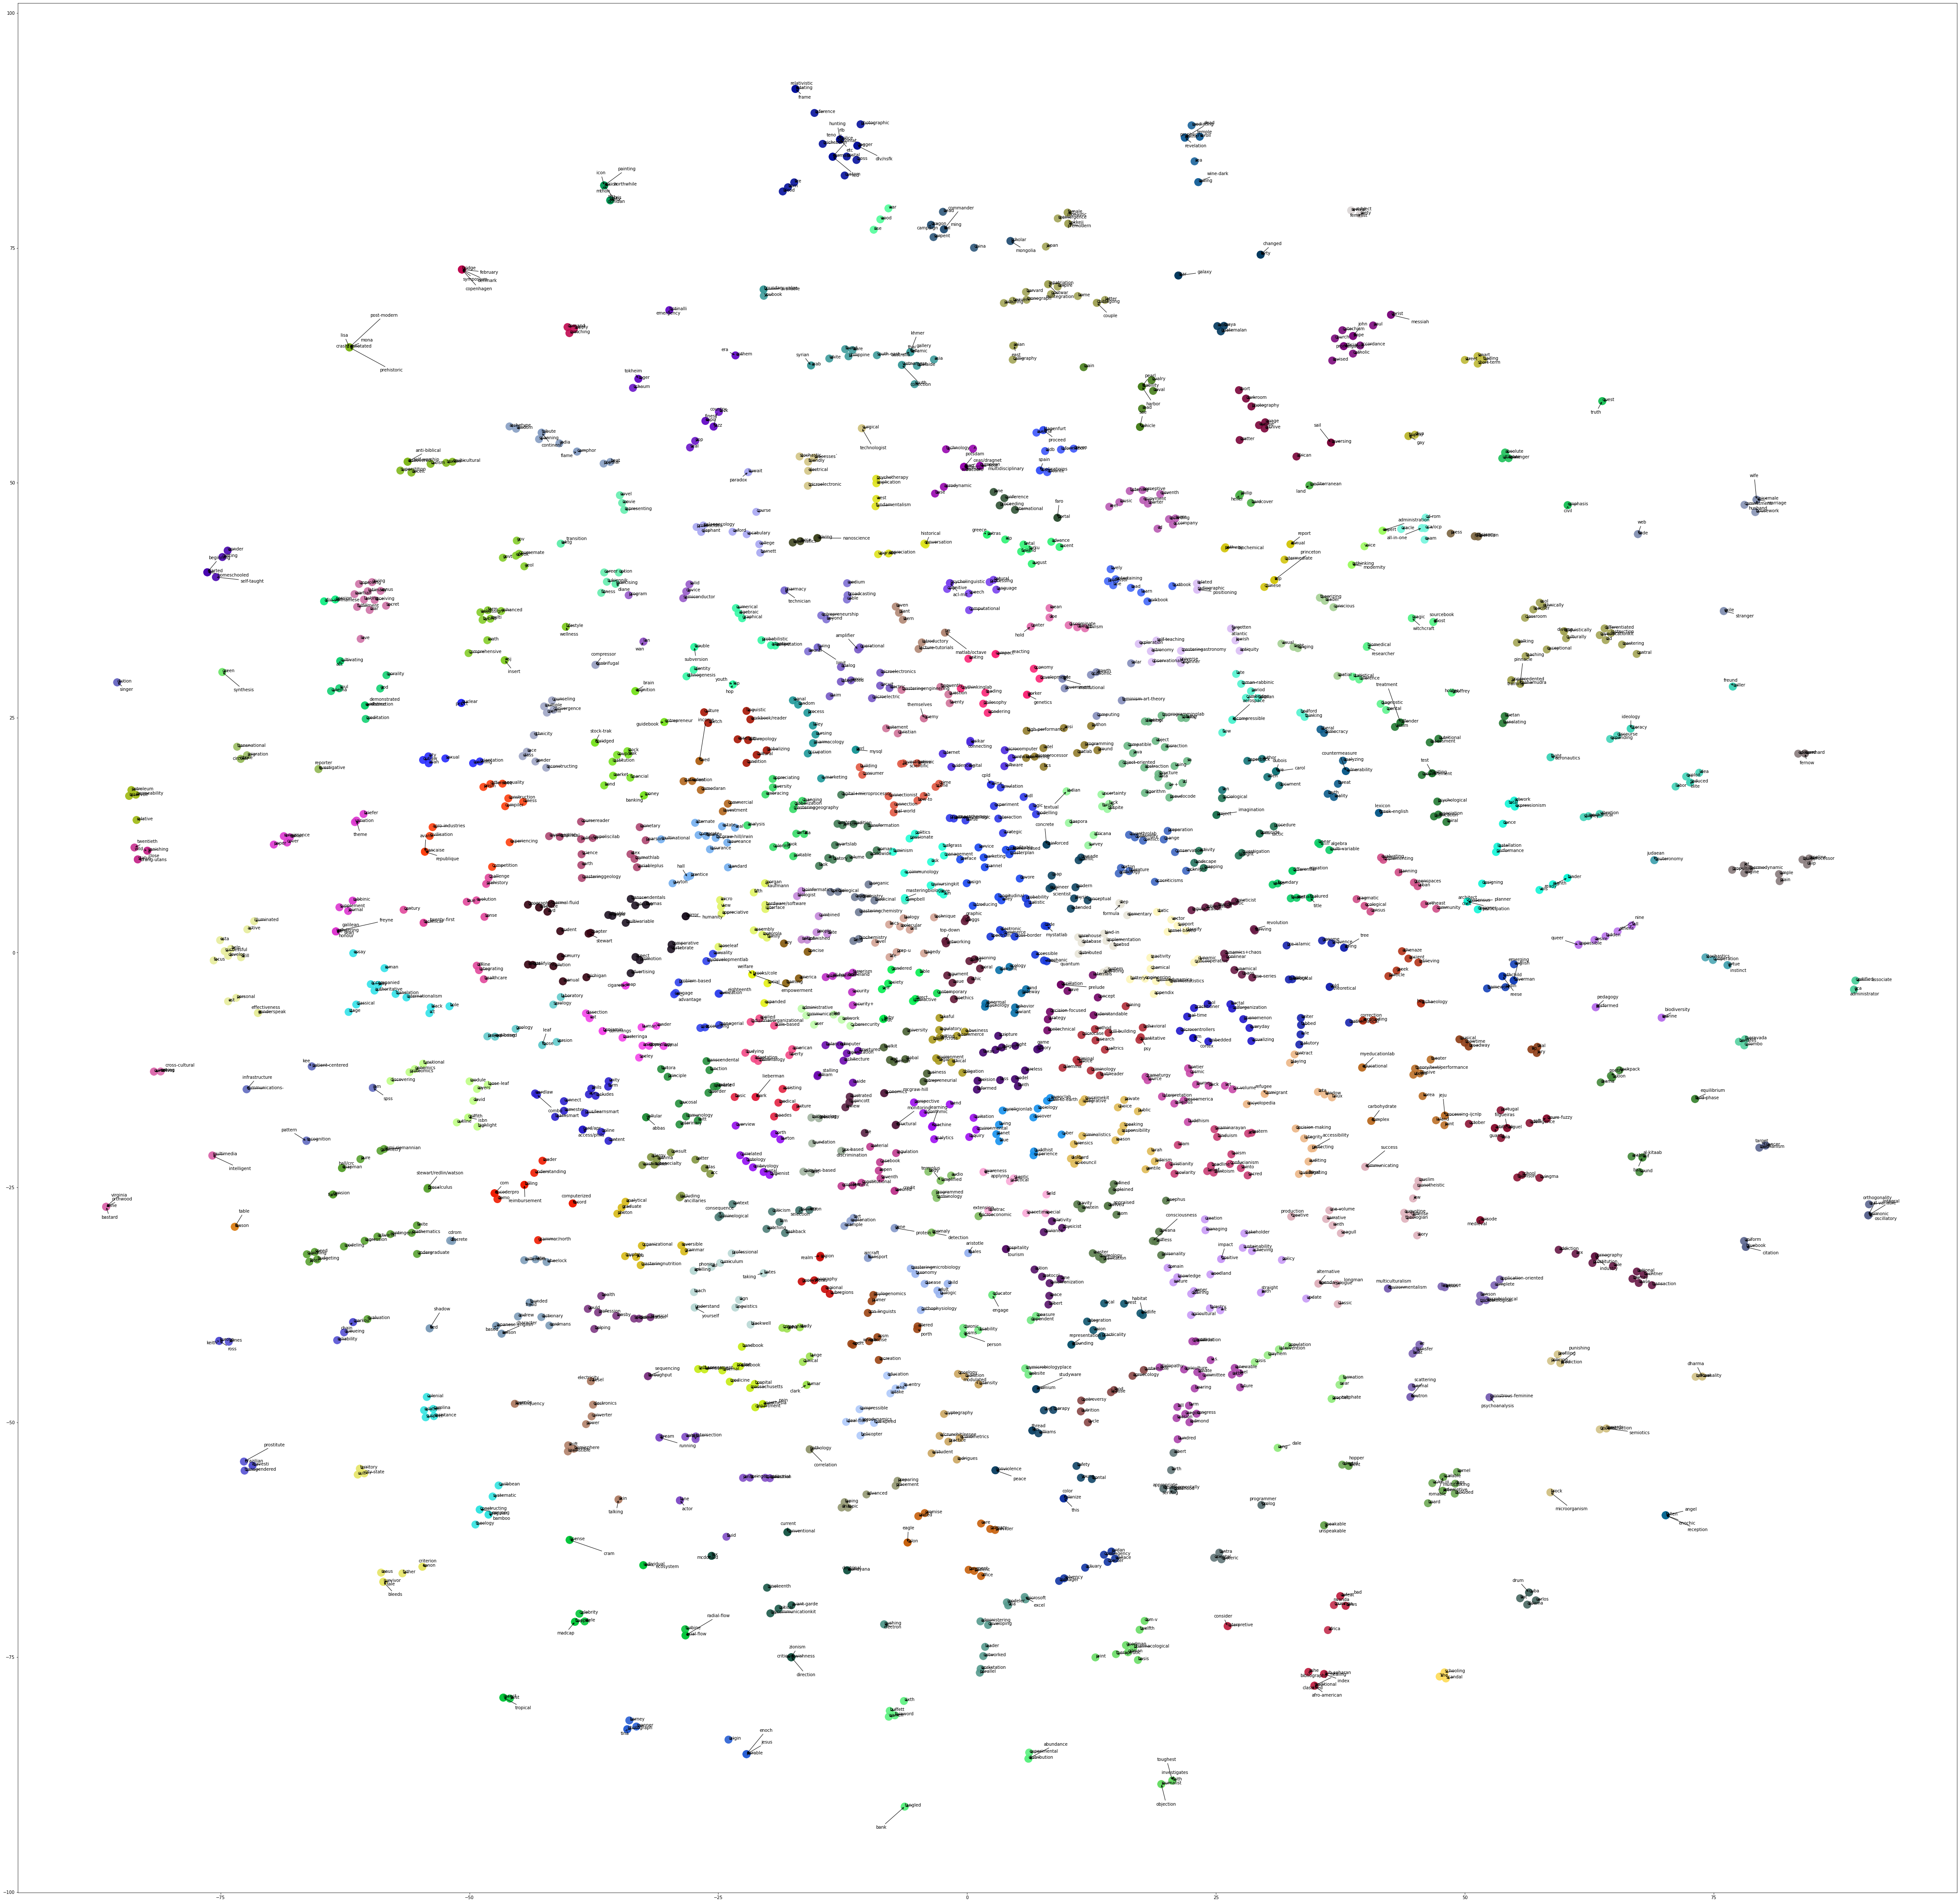

In [ ]:
transformer = TfidfTransformer()
X = transformer.fit_transform(X).toarray()

reducer = TSNE()
Z = reducer.fit_transform(X)
plot_k_means(Z[:,:2], current_index//10, index_word_map, show_plots=True)